# 线性回归从零开始实现  

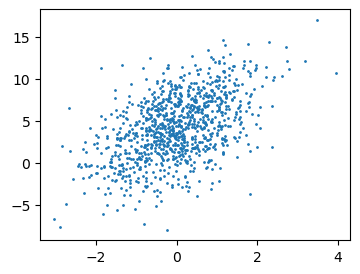

epoch 1, loss 0.297197
epoch 2, loss 0.005480
epoch 3, loss 0.000146
w的位置：tensor([[ 1.9933],
        [-3.3913]], requires_grad=True)
b的位置：tensor([4.1904], requires_grad=True)


In [10]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b # 广播机制
    y += torch.normal(0, 0.01, y.shape) #加上噪声
    return X, y.reshape((-1, 1)) #将y以列向量形式返回

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
plt.figure(figsize = (4, 3))
plt.scatter(features[:, 0], labels, s = 1)
plt.show()

#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices] # yield返回一个迭代器，每次调用都从上次的下一个位置进行返回

batch_size = 10

# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
# 定义优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# 训练
lr = 0.02
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(f'w的位置：{w}\nb的位置：{b}')

# 线性回归使用pytorch实现

**nn即neura network，nn.Sequential是一个有序的容器，神经网络模块将按照在传入构造器的顺序依次被添加到计算图中执行，同时以神经网络模块为元素的有序字典也可以作为传入参数，必须确保前一个模块的输出大小和下一个模块的输入大小是一致的。**  
相当于构建神经网络  
以下代码中，相当于只构建了只有一层线性单元的神经网络，net(tensor)表示输入一个张量经过这个神经网络得到输出

In [14]:
import torch
from torch.utils import data
from torch import nn

net = nn.Sequential(nn.Linear(1,1))
loss = nn.MSELoss()

print(net(torch.Tensor([[1]])))
print(net[0].weight.data)
print(net[0].bias.data)

tensor([[0.0092]], grad_fn=<AddmmBackward0>)
tensor([[0.8117]])
tensor([-0.8024])
